# Lambda School, Intro to Data Science, Day 8 — Classification!

## Assignment

Run this cell to load the Titanic data:

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'survived'

Then, train a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba), [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), or [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model. Use any features and parameters you want. 

Try to get better than 78.0% accuracy on the test set! (This is not required, but encouraged.)

Do refer to the lecture notebook — but try not to copy-paste.

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

After this, you may want to try [Kaggle's Titanic challenge](https://www.kaggle.com/c/titanic)!

In [2]:
train.shape, test.shape

((668, 14), (223, 14))

In [3]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,True


In [5]:
train.survived.value_counts(normalize=True)

0    0.613772
1    0.386228
Name: survived, dtype: float64

In [6]:
size = len(train)
size

668

In [0]:
predictions = [0]*size

Predictions = all zeros. why?

In [0]:
predictions = [1]*size

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(train.survived, predictions)

0.6137724550898204

In [17]:
from sklearn.metrics import confusion_matrix

def matrix(y_true, y_pred):
    data = confusion_matrix(y_true, y_pred)
    index = ['Actual 0', 'Actual 1']
    columns = ['Predicted 0', 'Predicted 1']
    return pd.DataFrame(data, index, columns)
                        
matrix(train.survived, predictions)

,Predicted 0,Predicted 1
Actual 0,410,0
Actual 1,258,0


In [18]:
train[['sex', 'age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 2 columns):
sex    668 non-null object
age    535 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.7+ KB


I will use the other way to find if there is missing information

In [19]:
train.age.isnull().sum()

133

In [20]:
train.sex.isnull().sum()

0

In [29]:
median_age = train.age.median()
median_age

29.0

In [0]:
train.age.fillna(median_age, inplace = True)

Note: If we don't write " inplace = True" in the code above, it won't fill median age

In [41]:
train.age.isnull().sum()

0

In [50]:
train[['male', 'age', 'survived']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 3 columns):
male        668 non-null bool
age         668 non-null float64
survived    668 non-null int64
dtypes: bool(1), float64(1), int64(1)
memory usage: 36.3 KB


Let's convert string in sex column to int

In [0]:
train['male'] = train.sex == 'male'
test['male'] = test.sex == 'male'

In [35]:
train[['sex', 'male']].head()

,sex,male
105,male,True
68,female,False
253,male,True
320,male,True
706,female,False


In [0]:
from sklearn.linear_model import LogisticRegression

In [42]:
train.male.isnull().sum()

0

In [47]:
train.age.isnull().sum()


0

In [52]:
features = ['male', 'age']
target = 'survived'

model = LogisticRegression()
model.fit(train[features], train[target])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7889221556886228


In [56]:
test[['male', 'age', 'survived']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 495 to 10
Data columns (total 3 columns):
male        223 non-null bool
age         179 non-null float64
survived    223 non-null int64
dtypes: bool(1), float64(1), int64(1)
memory usage: 5.4 KB


In [59]:
test_median_age = test.age.median()
test.age.fillna(test_median_age, inplace = True)
test.age.isnull().sum()

0

In [60]:
# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Test accuracy: 0.7802690582959642


In [61]:
matrix(y_true, y_pred)

,Predicted 0,Predicted 1
Actual 0,115,24
Actual 1,25,59


In [63]:
from sklearn.metrics import recall_score
recall_score(train.survived, predictions)
recall_score(y_true, y_pred)

0.7023809523809523

In [64]:
model.coef_, model.intercept_


(array([[-2.42358838, -0.0053056 ]]), array([1.18378889]))

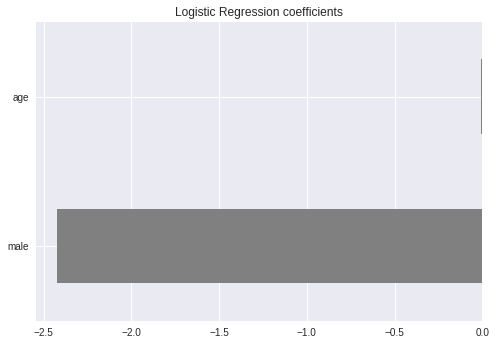

In [66]:
import matplotlib.pyplot as plt
pd.Series(model.coef_[0], features).plot.barh(color='gray')
plt.title('Logistic Regression coefficients');

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(train[features], train[target])

# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7949101796407185
Test accuracy: 0.7757847533632287


With Decision Tree Classifier, we can get accuracy result above 78%

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(train[features], train[target])

# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7964071856287425
Test accuracy: 0.7937219730941704


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


After an hour research and deep thought, I am able to use, Random Forest Classifier. Also I am able to get accuracy more than 78%. 
